In [8]:
#import nltk (Natural Language Tool Kit)
import nltk

#import re for regex or search library
import re

# "word_tokenize", which splits the text into tokens
from nltk import word_tokenize
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [101]:
sentence = "I lift up my eyes to the mountain's where does my help come from? My help comes from the Lord, the Maker of heaven and earth."

#convert sentences into words
sentence_tokens = word_tokenize(sentence)
print(sentence_tokens)

['I', 'lift', 'up', 'my', 'eyes', 'to', 'the', 'mountain', "'s", 'where', 'does', 'my', 'help', 'come', 'from', '?', 'My', 'help', 'comes', 'from', 'the', 'Lord', ',', 'the', 'Maker', 'of', 'heaven', 'and', 'earth', '.']


In [35]:
reg_pattern = r'\be\w*' #\b starts with e and w* captures the rest
re.findall(reg_pattern,sentence)

['eyes', 'earth']

In [83]:
test_cases = [
    ("woodchucks", r"woodchucks"),  # Exact match
    ("Mary Ann stopped by Mona’s", r"a"),  # Match character 'a'
    ("You’ve left the burglar behind again!", r"!"),  # Match '!'
    ("Woodchuck", r"[wW]oodchuck"),  # Match 'Woodchuck' or 'woodchuck'
    ("plenty of 7 to 5", r"[0-9]"),  # Match any digit
    ("Oyfn pripetchik", r"[^A-Z]"),  # Not an uppercase letter
    ("I have no exquisite reason for’t", r"[^Ss]"),  # Neither 'S' nor 's'
    ("look up aˆ b now", r"aˆb"),  # Match exactly "aˆb"
    ("woodchuck", r"woodchucks?"),  # Match "woodchuck" or "woodchucks"
    ("colour", r"colou?r"),  # Match "color" or "colour"
    ("baaa!", r"baaa*!"),  # Match "baa!", "baaa!", etc.
    ("Chapter 1: Down the Rabbit Hole", r"[0-9]+"),  # Match a number
    ("begun", r"beg.n"),  # Match any character between "beg" and "n"
    ("The dog.", r"^The dog\.$"),  # Match "The dog." as a full sentence
    ("99 bottles of beer", r"\b99\b"),  # Match "99" as a word
    ("the bigger they were, the bigger they will be", r"the (.*)er they were, the \1er they will be"),  # Capture group match
    ("some people like some people", r"(?:some|a few) (people|cats) like some \1"),  # Non-capturing group match
]

# Run all regex patterns
for text, pattern in test_cases:
    match = re.search(pattern, text)
    print(f"Regex: {pattern}\nText: \"{text}\"\nMatch: {match.group() if match else 'No match'}\n{'-'*40}")

Regex: woodchucks
Text: "woodchucks"
Match: woodchucks
----------------------------------------
Regex: a
Text: "Mary Ann stopped by Mona’s"
Match: a
----------------------------------------
Regex: !
Text: "You’ve left the burglar behind again!"
Match: !
----------------------------------------
Regex: [wW]oodchuck
Text: "Woodchuck"
Match: Woodchuck
----------------------------------------
Regex: [0-9]
Text: "plenty of 7 to 5"
Match: 7
----------------------------------------
Regex: [^A-Z]
Text: "Oyfn pripetchik"
Match: y
----------------------------------------
Regex: [^Ss]
Text: "I have no exquisite reason for’t"
Match: I
----------------------------------------
Regex: aˆb
Text: "look up aˆ b now"
Match: No match
----------------------------------------
Regex: woodchucks?
Text: "woodchuck"
Match: woodchuck
----------------------------------------
Regex: colou?r
Text: "colour"
Match: colour
----------------------------------------
Regex: baaa*!
Text: "baaa!"
Match: baaa!
---------------

In [105]:
#First we need to get all the words from the sentences to get the frequency and rank

#1. Tokenize
sentence_tokens = word_tokenize(sentence)
print(sentence_tokens)

print("-----------------")
#2. Count the word frequncy

from collections import Counter

freq = Counter(sentence_tokens)
freq




['I', 'lift', 'up', 'my', 'eyes', 'to', 'the', 'mountain', "'s", 'where', 'does', 'my', 'help', 'come', 'from', '?', 'My', 'help', 'comes', 'from', 'the', 'Lord', ',', 'the', 'Maker', 'of', 'heaven', 'and', 'earth', '.']
-----------------


Counter({'I': 1,
         'lift': 1,
         'up': 1,
         'my': 2,
         'eyes': 1,
         'to': 1,
         'the': 3,
         'mountain': 1,
         "'s": 1,
         'where': 1,
         'does': 1,
         'help': 2,
         'come': 1,
         'from': 2,
         '?': 1,
         'My': 1,
         'comes': 1,
         'Lord': 1,
         ',': 1,
         'Maker': 1,
         'of': 1,
         'heaven': 1,
         'and': 1,
         'earth': 1,
         '.': 1})

In [106]:
print("-----------------")
#3. Sort them in decreasing order
#sorted(iterable, key=key, reverse=reverse)
import pandas as pd

df = pd.DataFrame(freq.most_common(),columns=["Word","Frequency"])
df['rank'] = df['Frequency'].rank(method="min", ascending=False).astype(int)
df

-----------------


,Word,Frequency,rank
0,the,3,1
1,my,2,2
2,help,2,2
3,from,2,2
4,I,1,5
5,lift,1,5
6,up,1,5
7,eyes,1,5
8,to,1,5
9,mountain,1,5


Zipf's law: Famously, Zipf's law states that word frequency is inversely proportional to the rank frequency of a word. When visualized, Frequency ~ Rank(Frequency) exhibits a classic power law relationship.

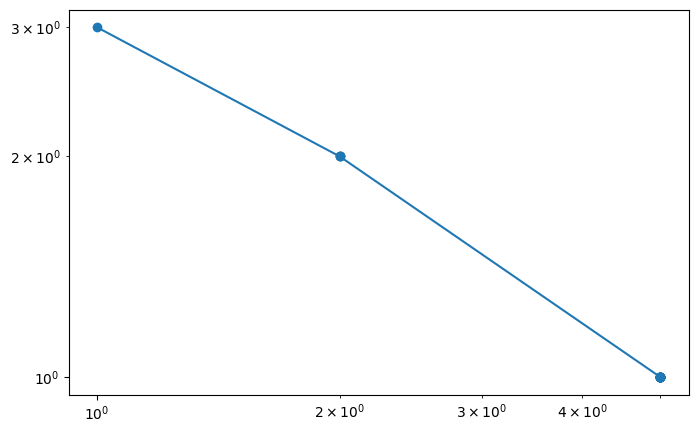

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(8, 5))
plt.loglog(df['rank'], df['Frequency'], marker="o", linestyle="-", label="Word Frequencies")

Remove punctuations

In [118]:
#nltk.download("punkt")
# word.isalpha() checks if the word contains only letters (A-Z, a-z). This helps us to remove punctuations

def remove_punct(token):
 return [word for word in token if word.isalpha()]

sent = remove_punct(sentence_tokens)
print(sent)

['I', 'lift', 'up', 'my', 'eyes', 'to', 'the', 'mountain', 'where', 'does', 'my', 'help', 'come', 'from', 'My', 'help', 'comes', 'from', 'the', 'Lord', 'the', 'Maker', 'of', 'heaven', 'and', 'earth']


Stemming is the process of reducing the words to their word stem or root form. The objective of stemming is to reduce related words to the same stem even if the stem is not a dictionary word. For example, connection, connected, connecting word reduce to a common word “connect”.



In [119]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps_stem_sent = [ps.stem(words_sent) for words_sent in sent]
print(ps_stem_sent)

['i', 'lift', 'up', 'my', 'eye', 'to', 'the', 'mountain', 'where', 'doe', 'my', 'help', 'come', 'from', 'my', 'help', 'come', 'from', 'the', 'lord', 'the', 'maker', 'of', 'heaven', 'and', 'earth']


Unlike stemming, lemmatization reduces words to their base word, reducing the inflected words properly and ensuring that the root word belongs to the language. It’s usually more sophisticated than stemming, since stemmers works on an individual word without knowledge of the context. In lemmatization, a root word is called lemma. A lemma is the canonical form, dictionary form, or citation form of a set of words.

In [120]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

lem_sent = [lemmatizer.lemmatize(words_sent) for words_sent in sent]
print(lem_sent)

['I', 'lift', 'up', 'my', 'eye', 'to', 'the', 'mountain', 'where', 'doe', 'my', 'help', 'come', 'from', 'My', 'help', 'come', 'from', 'the', 'Lord', 'the', 'Maker', 'of', 'heaven', 'and', 'earth']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
